In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train = pd.read_csv('./train_data.csv')
test = pd.read_csv('./test_features.csv')

<AxesSubplot:xlabel='firstName_count', ylabel='poi'>

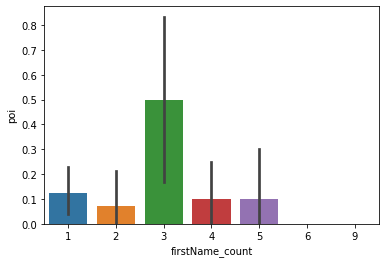

In [34]:
# name特徵中擷取新特徵
train['firstName'] = train['name'].apply(lambda x: x.split()[1])

train['firstName_count'] = train['firstName'].map(dict(train['firstName'].value_counts()))

sns.barplot(x='firstName_count', y='poi', data=train)

##### 具有適中個數的名犯罪率較高

<AxesSubplot:xlabel='firstName', ylabel='poi'>

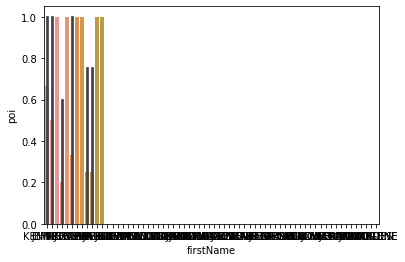

In [10]:
for i in train.columns:
    print(i,train[i].isnull().mean())

name 0.0
bonus 0.46017699115044247
deferral_payments 0.7522123893805309
deferred_income 0.6991150442477876
director_fees 0.8849557522123894
email_address 0.26548672566371684
exercised_stock_options 0.2831858407079646
expenses 0.35398230088495575
from_messages 0.4247787610619469
from_poi_to_this_person 0.4247787610619469
from_this_person_to_poi 0.4247787610619469
loan_advances 0.9823008849557522
long_term_incentive 0.5663716814159292
other 0.3893805309734513
poi 0.0
restricted_stock 0.2743362831858407
restricted_stock_deferred 0.911504424778761
salary 0.35398230088495575
shared_receipt_with_poi 0.4247787610619469
to_messages 0.4247787610619469
total_payments 0.1504424778761062
total_stock_value 0.13274336283185842


count    2.800000e+01
mean     6.344374e+05
std      8.603646e+05
min     -1.025000e+05
25%      7.656750e+04
50%      1.951900e+05
75%      8.342052e+05
max      2.964506e+06
Name: deferral_payments, dtype: float64

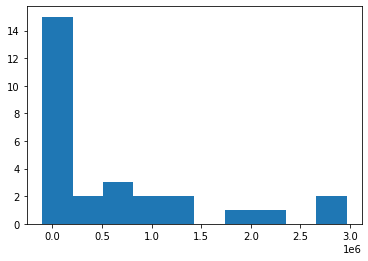

In [45]:
plt.hist(train['deferral_payments'])
train['deferral_payments'].describe()

(array([ 1.,  1.,  0.,  0.,  0.,  0.,  2.,  2.,  5., 23.]),
 array([-3.5043860e+06, -3.1540516e+06, -2.8037172e+06, -2.4533828e+06,
        -2.1030484e+06, -1.7527140e+06, -1.4023796e+06, -1.0520452e+06,
        -7.0171080e+05, -3.5137640e+05, -1.0420000e+03]),
 <BarContainer object of 10 artists>)

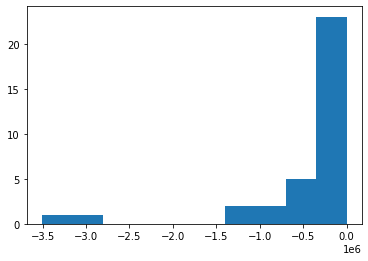

In [42]:
plt.hist(train['deferred_income'])

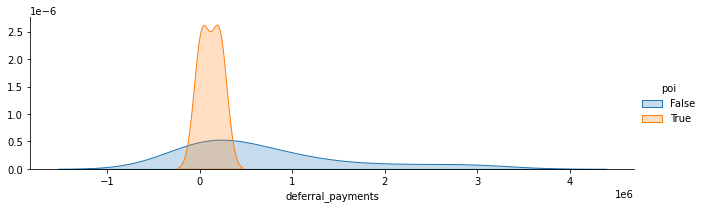

In [44]:
fareFacet=sns.FacetGrid(train,hue='poi',aspect=3)
fareFacet.map(sns.kdeplot,'deferral_payments',shade=True)
# fareFacet.set(xlim=(0,150))
fareFacet.add_legend()